 # Individual household electric power consumption analysis

##Importing Libraries


In [1]:
import matplotlib.pyplot as plt
import urllib.request
import zipfile
import pandas as pd
from datetime import datetime
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess


###Changing matplotlib default plot size for better visualization

In [2]:
plt.rcParams['figure.figsize'] = [20, 7]

##Downloading Data

In [3]:
urllib.request.urlretrieve("https://archive.ics.uci.edu/ml/machine-learning-databases/00235/household_power_consumption.zip", "household_power_consumption.zip")

('household_power_consumption.zip',
 <http.client.HTTPMessage at 0x7f6fe8a89490>)

##Unziping files

In [4]:
with zipfile.ZipFile("household_power_consumption.zip", 'r') as zip_ref:
    zip_ref.extractall("household_power_consumption")

##Reading Data
'nan' and '?' treated as missing data

In [5]:
raw_df = pd.read_csv('household_power_consumption/household_power_consumption.txt', sep=";", na_values=['nan','?'])

##Setting Datetime as the index
In order to use date and time as the official index of the dataset, a new feature joining both informations is created. 

In [6]:
raw_df["datetime"] = pd.to_datetime(raw_df['Date'] + " " + raw_df['Time'], format='%d/%m/%Y %H:%M:%S')

raw_df = raw_df.set_index(['datetime'])
raw_df.index = pd.to_datetime(raw_df.index)

##Exploratory analysis of the dataset
Shape, count, mean, and others are checked. 
The analyses are done to understand the main characteristics of the dataset.


In [7]:
raw_df.shape

(2075259, 9)

In [8]:
raw_df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [9]:
raw_df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,,,
2006-12-16 17:24:00,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [10]:
raw_df.tail()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,,,
2010-11-26 20:58:00,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2010-11-26 20:59:00,26/11/2010,20:59:00,0.944,0.0,240.00,4.0,0.0,0.0,0.0
2010-11-26 21:00:00,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2010-11-26 21:01:00,26/11/2010,21:01:00,0.934,0.0,239.70,3.8,0.0,0.0,0.0
2010-11-26 21:02:00,26/11/2010,21:02:00,0.932,0.0,239.55,3.8,0.0,0.0,0.0


##Missing data
Checking if the dataset has null values and, in case they exist, treating them below by interpolating backward and after values.

In [11]:
raw_df.isnull().sum()

Date                         0
Time                         0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [12]:
raw_df[raw_df.isnull()]

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,,,
2006-12-16 17:24:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-12-16 17:25:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-12-16 17:26:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-12-16 17:27:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-12-16 17:28:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2010-11-26 20:58:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-11-26 20:59:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-11-26 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
raw_df.interpolate()[raw_df['Sub_metering_3'].isnull()]


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,,,
2006-12-21 11:23:00,21/12/2006,11:23:00,0.244667,0.000000,242.106667,1.000000,0.000000,0.0,0.000000
2006-12-21 11:24:00,21/12/2006,11:24:00,0.245333,0.000000,241.923333,1.000000,0.000000,0.0,0.000000
2006-12-30 10:08:00,30/12/2006,10:08:00,6.417333,0.402000,237.230000,27.066667,37.666667,22.0,17.666667
2006-12-30 10:09:00,30/12/2006,10:09:00,6.616667,0.390000,237.060000,27.933333,37.333333,25.0,17.333333
2007-01-14 18:36:00,14/1/2007,18:36:00,3.213000,0.257000,233.000000,13.800000,0.000000,0.0,16.500000
...,...,...,...,...,...,...,...,...,...
2010-09-28 19:09:00,28/9/2010,19:09:00,2.336326,0.000037,234.925712,9.792974,0.000000,0.0,17.987018
2010-09-28 19:10:00,28/9/2010,19:10:00,2.336745,0.000027,234.924284,9.794731,0.000000,0.0,17.990263
2010-09-28 19:11:00,28/9/2010,19:11:00,2.337163,0.000018,234.922856,9.796487,0.000000,0.0,17.993509


In [14]:
df = raw_df.interpolate()
df.isnull().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

##New feature
Creating Active Energy Consumed feature:
global_active_power*1000/60 - sub_metering_1 - sub_metering_2 - sub_metering_3
(formula given at dataset website)

In [15]:
df["active_energy_consumed"] = (df['Global_active_power']*1000/60) -(df['Sub_metering_1'] + df['Sub_metering_2'] + df['Sub_metering_3'])
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,active_energy_consumed
datetime,,,,,,,,,,
2006-12-16 17:24:00,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,52.266667
2006-12-16 17:25:00,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,72.333333
2006-12-16 17:26:00,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,70.566667
2006-12-16 17:27:00,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,71.800000
2006-12-16 17:28:00,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,43.100000


Plotting Energy consumed using all available data (considering Date as date + time). Also plotting Energy consumed in a week.

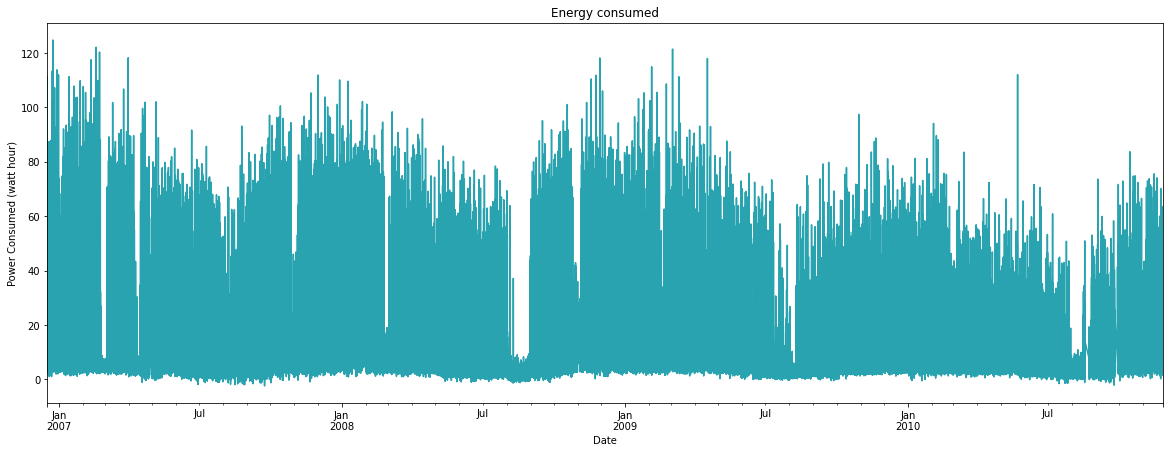

In [16]:
df["active_energy_consumed"].plot(color='#28a3af', title='Energy consumed', ylabel = 'Power Consumed (watt hour)', xlabel = ("Date"))


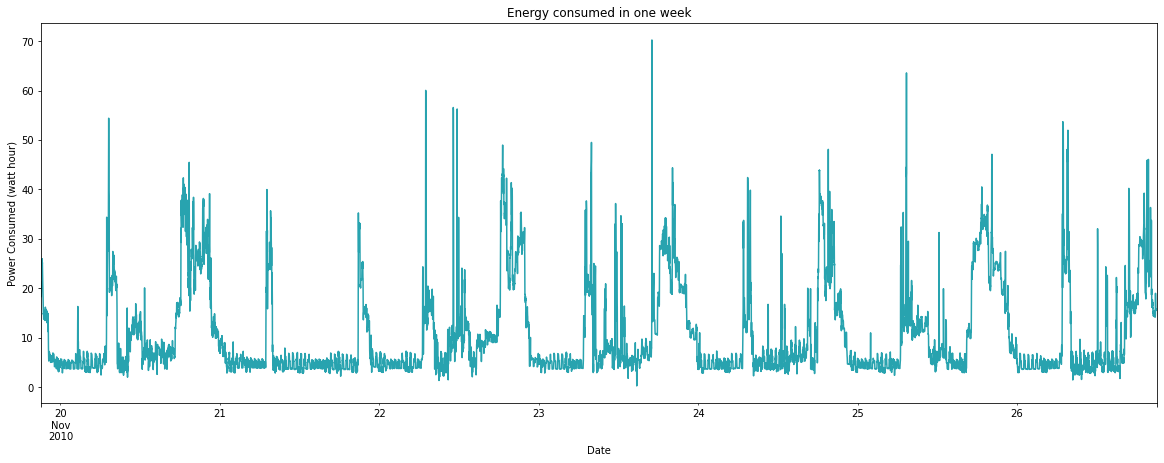

In [17]:
df["active_energy_consumed"].tail(1440*7).plot(color='#28a3af', title='Energy consumed in one week', ylabel = 'Power Consumed (watt hour)', xlabel = ("Date"))

#Outliers
As seen in a graph above, there are time intervals that can be considered outliers. The first hypothesis is that the data is missing or has quality issues. A period of five and then one month are checked below to see more details.
At last, the hypothesis of electrical measurement issues is analyzed, but there are only two missing data in this interval.
One can conclude that the data is not missing nor has quality issues. Since France is a country in the northern hemisphere (summer between June and September), this anomaly may be due to vacations.

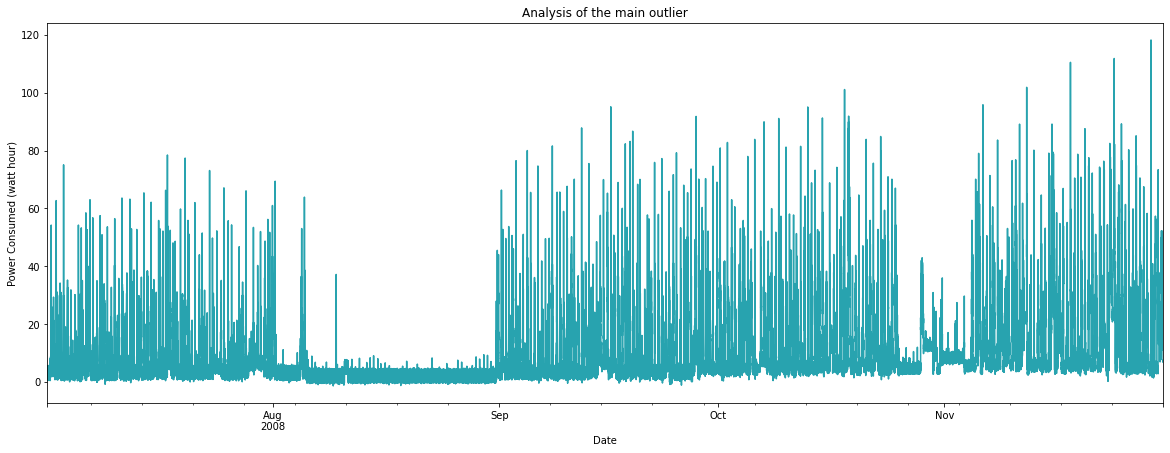

In [18]:


start_datetime = datetime.strptime('2008-07-01 01:00:00', '%Y-%m-%d %H:%M:%S')
end_datetime = datetime.strptime('2008-11-30 23:59:01', '%Y-%m-%d %H:%M:%S')

df_outlier = df.loc[start_datetime:end_datetime]
df_outlier["active_energy_consumed"].plot(color='#28a3af', title='Analysis of the main outlier', ylabel = 'Power Consumed (watt hour)', xlabel = ("Date"))

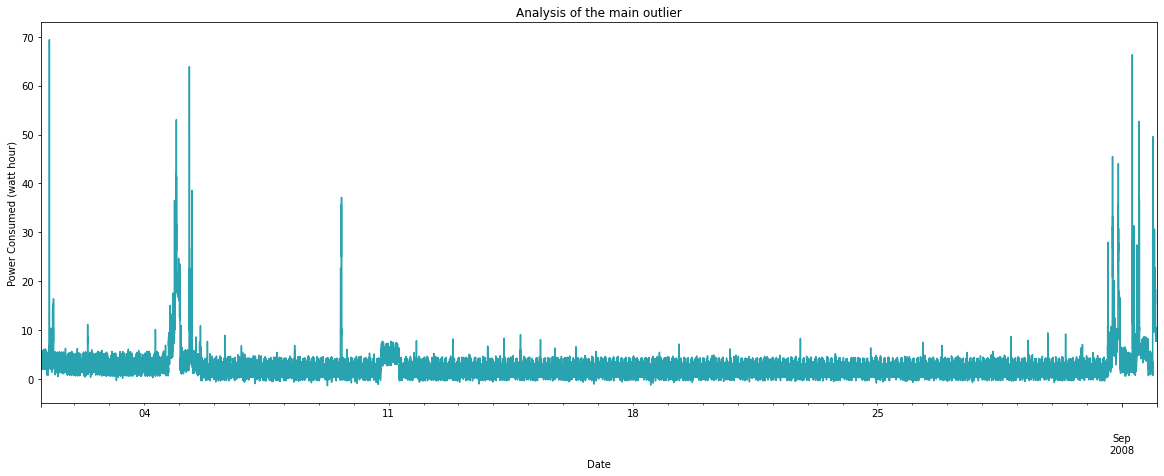

In [19]:
start_datetime = datetime.strptime('2008-08-01 01:00:00', '%Y-%m-%d %H:%M:%S')
end_datetime = datetime.strptime('2008-09-01 23:59:01', '%Y-%m-%d %H:%M:%S')

df_outlier = df.loc[start_datetime:end_datetime]
df_outlier["active_energy_consumed"].plot(color='#28a3af', title='Analysis of the main outlier', ylabel = 'Power Consumed (watt hour)', xlabel = ("Date"))

In [20]:
start_datetime = datetime.strptime('2008-08-01 01:00:00', '%Y-%m-%d %H:%M:%S')
end_datetime = datetime.strptime('2008-09-01 23:59:01', '%Y-%m-%d %H:%M:%S')

df_outlier3 = raw_df.loc[start_datetime:end_datetime]

print("Missing Data on the outlier")
df_outlier3.isnull().sum()


Missing Data on the outlier


Date                     0
Time                     0
Global_active_power      2
Global_reactive_power    2
Voltage                  2
Global_intensity         2
Sub_metering_1           2
Sub_metering_2           2
Sub_metering_3           2
dtype: int64

#Analysis of data per time
Some analyses of the consumption behavior per year, month, week, and day are made to look for patterns.
Mean power consumed decreases per year; in summer, less energy is consumed (may be due to summer vacation).

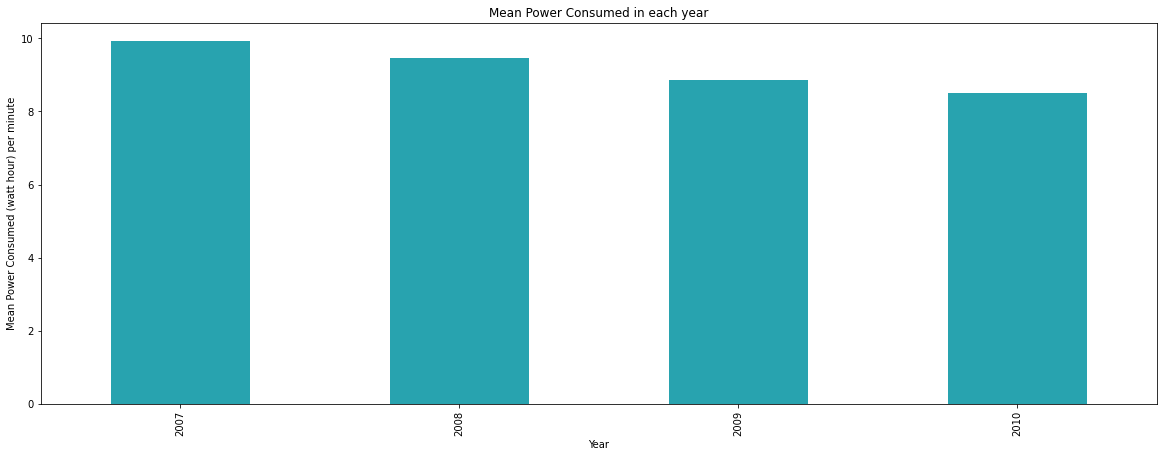

In [21]:
start_datetime = datetime.strptime('2007-01-01 00:00:00', '%Y-%m-%d %H:%M:%S')
end_datetime = datetime.strptime('2020-09-01 23:59:01', '%Y-%m-%d %H:%M:%S')

df_year = df.loc[start_datetime:end_datetime] 
df_year = df_year.groupby(df_year.index.strftime('%Y')).mean()
df_year["active_energy_consumed"].plot(kind="bar",color='#28a3af', title='Mean Power Consumed in each year', ylabel = 'Mean Power Consumed (watt hour) per minute', xlabel = ("Year"))


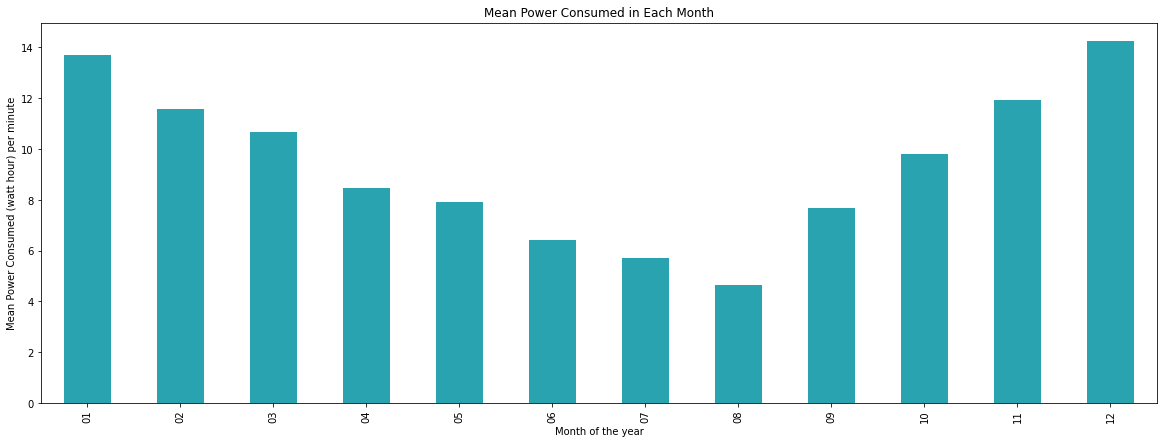

In [22]:
df_month = df.groupby(df.index.strftime('%m')).mean()
#df_month.set_index(['datetime'])
df_month["active_energy_consumed"].plot(kind="bar",color='#28a3af', title='Mean Power Consumed in Each Month', ylabel = 'Mean Power Consumed (watt hour) per minute', xlabel = ("Month of the year"))

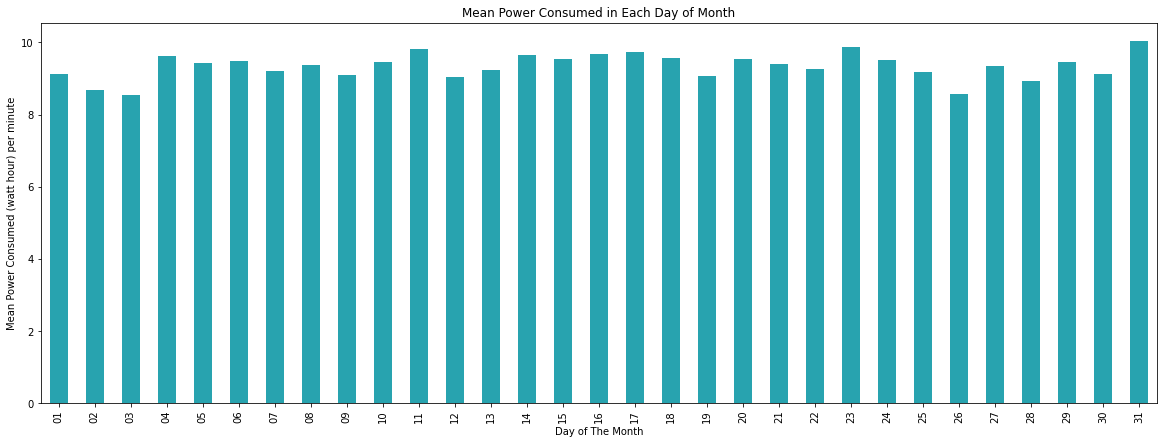

In [23]:
df_day = df.groupby(df.index.strftime('%d')).mean()
df_day["active_energy_consumed"].plot(kind="bar",color='#28a3af', title='Mean Power Consumed in Each Day of Month', ylabel = 'Mean Power Consumed (watt hour) per minute', xlabel = ("Day of The Month"))

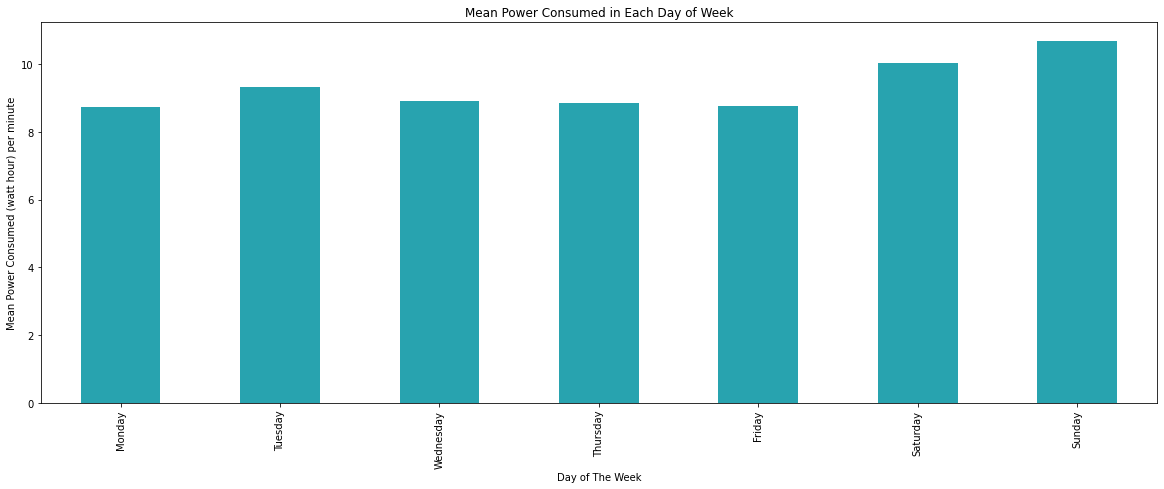

In [24]:
df_week = df.groupby(df.index.weekday).mean()

df_week.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_week["active_energy_consumed"].plot(kind="bar",color='#28a3af', title='Mean Power Consumed in Each Day of Week', ylabel = 'Mean Power Consumed (watt hour) per minute', xlabel = ("Day of The Week"))



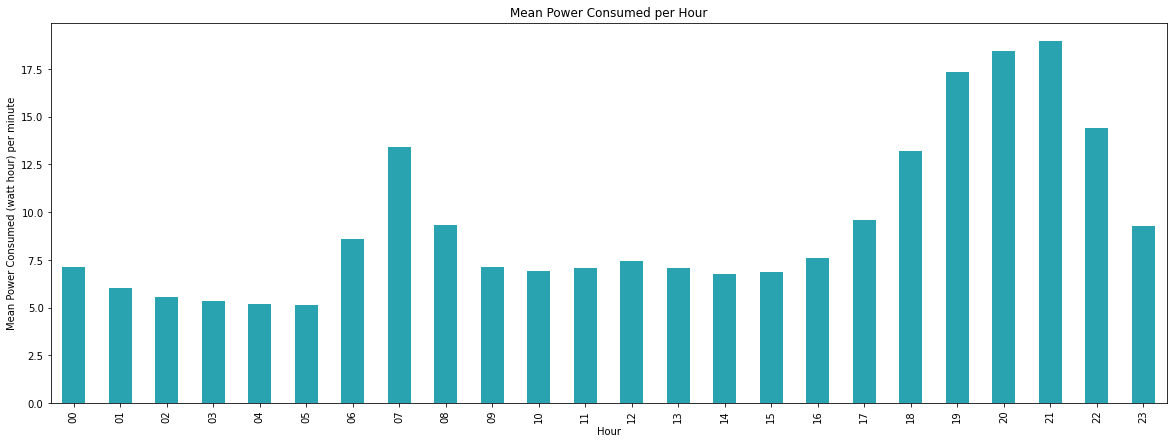

In [25]:
df_hour = df.groupby(df.index.strftime('%H')).mean()

df_hour["active_energy_consumed"].plot(kind="bar",color='#28a3af', title='Mean Power Consumed per Hour', ylabel = 'Mean Power Consumed (watt hour) per minute', xlabel = ("Hour"))

##Rolling (or Moving) Average
With this average, you can check the power consumption trend—the level of granularity is hours and days.
Then a linear regression is used to predict this trend for the next two years to analyze the behavior.

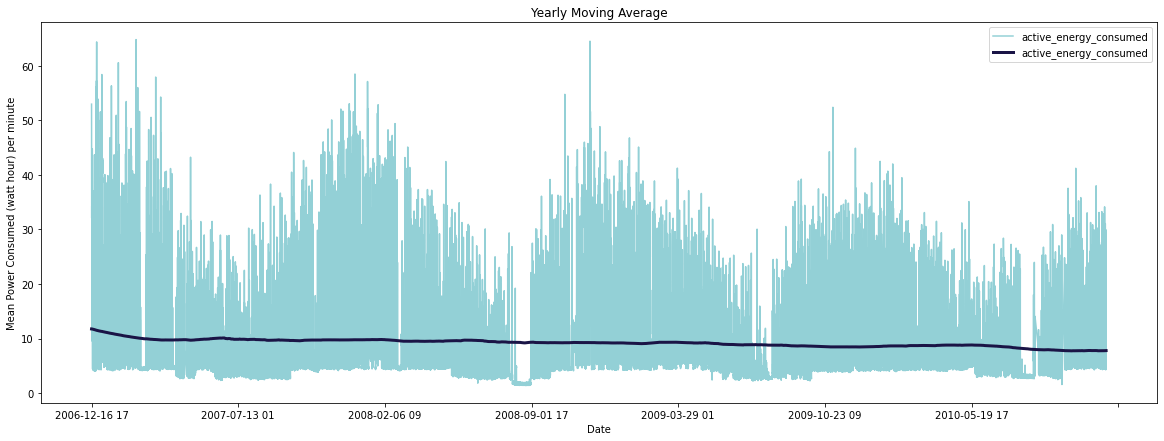

In [26]:
df_group_hour = df.groupby(df.index.strftime('%Y-%m-%d %H')).mean()
trend = df_group_hour["active_energy_consumed"].rolling(
    window=8760,
    center=True,
    min_periods=183,
).mean()

ax = df_group_hour["active_energy_consumed"].plot(alpha=0.5, color='#28a3af', title='Yearly Moving Average', ylabel = 'Mean Power Consumed (watt hour) per minute', xlabel = ("Date"))
ax = trend.plot(ax=ax, linewidth=3, color='#1a1446', xlabel = ("Date"))
plt.legend()

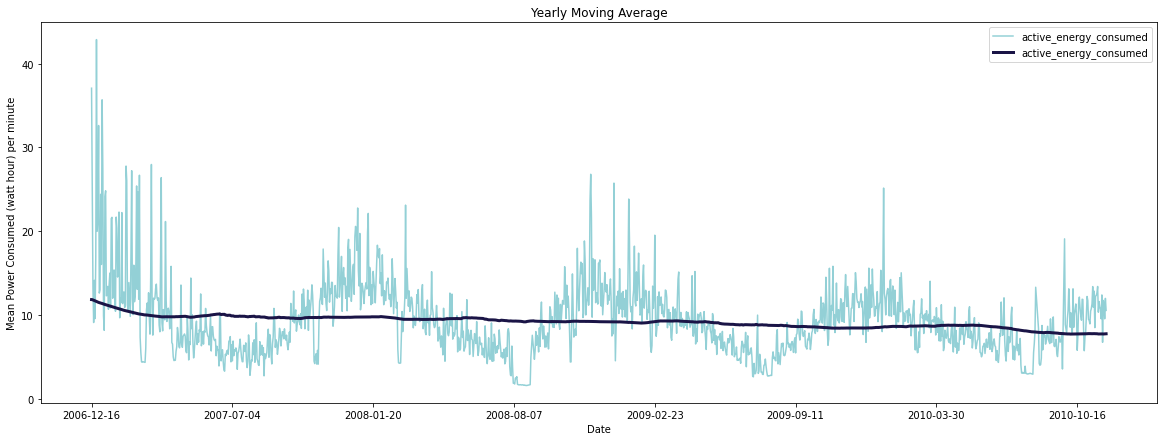

In [27]:
df_group_day = df.groupby(df.index.strftime('%Y-%m-%d')).mean()
trend = df_group_day["active_energy_consumed"].rolling(
    window=365,
    center=True,
    min_periods=183,
).mean()

ax = df_group_day["active_energy_consumed"].plot(alpha=0.5,color='#28a3af', title='Yearly Moving Average', ylabel = 'Mean Power Consumed (watt hour) per minute', xlabel = ("Date"))
ax = trend.plot(ax=ax, linewidth=3,color='#1a1446', xlabel = ("Date"))
plt.legend()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/deterministic.py:152: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Int64Indexes with a unit increment support extending. The index is set will contain the position relative to the data length.
  UserWarning,


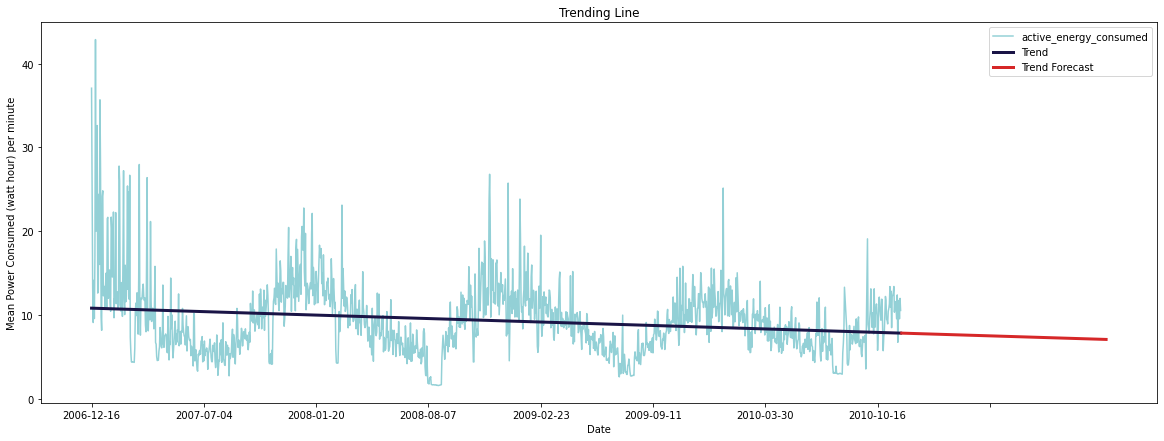

In [28]:
y = df_group_day["active_energy_consumed"].copy()

dp = DeterministicProcess(index=y.index, order=1)
X = dp.in_sample()
X_fore = dp.out_of_sample(steps=365)
model = LinearRegression()
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)
y_fore = pd.Series(model.predict(X_fore), index=X_fore.index)

ax = y.plot(alpha=0.5, color='#28a3af', title='Trending Line', ylabel = 'Mean Power Consumed (watt hour) per minute', xlabel = ("Date"))
ax = y_pred.plot(ax=ax, linewidth=3, label="Trend",color='#1a1446', xlabel = ("Date"))
ax = y_fore.plot(ax=ax, linewidth=3, label="Trend Forecast", color='C3')
plt.legend()

##Periodogram
Periodogram is a method developed after Fourier Series (with deterministic information such as calendar day) in which you can check the frequency of each granularity of time. After doing it, you can see what seasonality is frequent in your data. 
Annual and day are the most common. Semidaily variance may be due to the decrease of power consumption during working hours and its increase before and after, but more analysis and data are necessary to achieve a definitive conclusion.
At last, with a method like this, you can plot the prediction of the next two years with a higher granularity (here, it was used yearly).

In [29]:
def plot_periodogram(ts, detrend='linear', ax=None):
    from scipy.signal import periodogram
    fs = pd.Timedelta("1Y") / pd.Timedelta("1H")
    freqencies, spectrum = periodogram(
        ts,
        fs=fs,
        detrend=detrend,
        window="boxcar",
        scaling='spectrum',
    )
    if ax is None:
        _, ax = plt.subplots()
    ax.step(freqencies, spectrum, color='#1a1446')
    ax.set_xscale("log")
    ax.set_xticks([1, 2, 4, 6, 12, 26, 52, 104, 365, 730])
    ax.set_xticklabels(
        [
            "Annual (1)",
            "Semiannual (2)",
            "Quarterly (4)",
            "Bimonthly (6)",
            "Monthly (12)",
            "Biweekly (26)",
            "Weekly (52)",
            "Semiweekly (104)",
            "Daily (365)",
            "Semidaily (730)"
        ],
        rotation=30,
    )
    ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
    ax.set_ylabel("Variance")
    ax.set_title("Periodogram")
    return ax

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Units 'M', 'Y' and 'y' do not represent unambiguous timedelta values and will be removed in a future version
  after removing the cwd from sys.path.


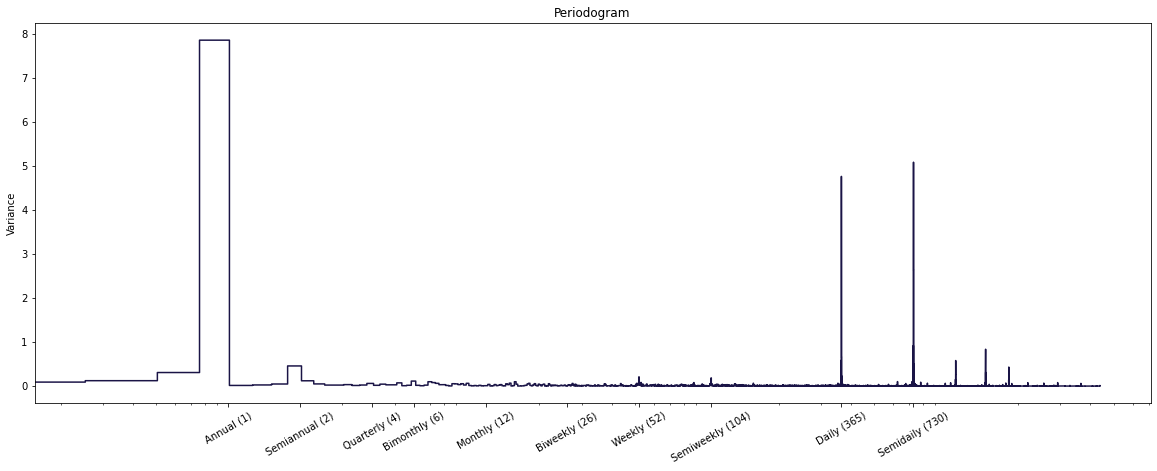

In [30]:
y = df_group_hour[["active_energy_consumed"]].copy()
y['date'] = pd.to_datetime(y.index)
y = y.set_index("date")[["active_energy_consumed"]].to_period('H')["active_energy_consumed"]
plot_periodogram(y)

In [31]:
y = df_group_day[["active_energy_consumed"]].copy()
y['date'] = pd.to_datetime(y.index)
y = y.set_index("date")[["active_energy_consumed"]].to_period('D')["active_energy_consumed"]

In [32]:

fourier = CalendarFourier(freq="A", order=10) 

dp = DeterministicProcess(
    index=y.index,
    constant=True,               # dummy feature for bias (y-intercept)
    order=1,                     # trend (order 1 means linear)
    seasonal=True,               # weekly seasonality (indicators)
    additional_terms=[fourier],  # annual seasonality (fourier)
    drop=True,                   # drop terms to avoid collinearity
)

X = dp.in_sample()  # create features for dates in tunnel.index

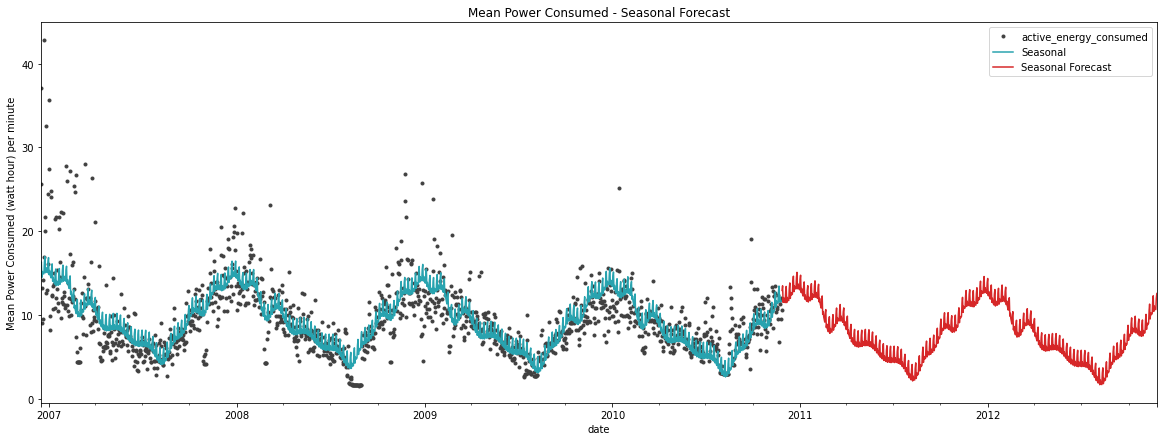

In [33]:
model = LinearRegression(fit_intercept=False)
_ = model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=y.index)
X_fore = dp.out_of_sample(steps=730)
y_fore = pd.Series(model.predict(X_fore), index=X_fore.index)

ax = y.plot(color='0.25', style='.', title="Mean Power Consumed - Seasonal Forecast", ylabel = 'Mean Power Consumed (watt hour) per minute')
ax = y_pred.plot(ax=ax, label="Seasonal", color='#28a3af')
ax = y_fore.plot(ax=ax, label="Seasonal Forecast", color='C3')
_ = ax.legend()

